
**1. What is unsupervised learning in the context of machine learning?**

* A type of machine learning where **no labeled data** is provided.
* The goal is to **discover hidden patterns**, **groupings**, or **structures** in data.
* Examples: **Clustering**, **Dimensionality Reduction**.

---

**2. How does K-Means clustering algorithm work?**

1. Choose number of clusters $k$.
2. Initialize $k$ centroids randomly.
3. Assign each point to the **nearest centroid**.
4. Recalculate centroids as **mean of assigned points**.
5. Repeat steps 3–4 until centroids stabilize.

---

**3. Explain the concept of a dendrogram in hierarchical clustering.**

* A dendrogram is a **tree-like diagram** that records the **merging or splitting of clusters**.
* Helps **visualize cluster hierarchy** and decide the **number of clusters** by cutting the tree.

---

**4. Main difference between K-Means and Hierarchical Clustering:**

| K-Means                 | Hierarchical                     |
| ----------------------- | -------------------------------- |
| Requires specifying $k$ | No need to specify $k$ initially |
| Flat clustering         | Builds nested clusters (tree)    |
| Fast and scalable       | Slower on large datasets         |

---

**5. Advantages of DBSCAN over K-Means:**

* Can find **arbitrarily shaped clusters**.
* **No need to pre-specify $k$**.
* **Handles noise/outliers** better.
* Works well with **non-spherical** clusters.

---

**6. When would you use Silhouette Score in clustering?**

* To **measure cluster quality**.
* Values range from **-1 to 1**:

  * Close to **1**: well-clustered.
  * Close to **0**: overlapping.
  * **Negative**: wrong assignment.
* Use to **compare different $k$** values or algorithms.

---

**7. Limitations of Hierarchical Clustering:**

* **Computationally expensive** for large datasets (O(n²)).
* **Cannot undo** merges or splits.
* Sensitive to **noise and outliers**.

---

**8. Why is feature scaling important in K-Means?**

* K-Means uses **Euclidean distance**.
* Features with larger ranges **dominate** distance calculation.
* Apply **standardization or normalization** before clustering.

---

**9. How does DBSCAN identify noise points?**

* Points that are **not reachable** from any dense region (cluster).
* If a point has **fewer than `min_samples` neighbors** within `eps` radius, it's labeled as **noise**.

---

**10. Define inertia in the context of K-Means:**

* **Sum of squared distances** between each point and its cluster centroid.
* Measures **compactness** of clusters.
* Lower inertia = **tighter clusters**.

---

**11. What is the elbow method in K-Means clustering?**

* Plot **inertia vs. number of clusters (k)**.
* The point where **inertia starts decreasing slowly** (forming an "elbow") is the **optimal k**.

---

**12. Describe the concept of "density" in DBSCAN:**

* A region is **dense** if it has at least **`min_samples` points within radius `eps`**.
* Clusters are **formed from dense regions**.

---

**13. Can hierarchical clustering be used on categorical data?**

* Not directly with Euclidean distance.
* Use **other distance measures** like Hamming or Jaccard.
* Can apply **Gower distance** for mixed-type data.

---

**14. What does a negative Silhouette Score indicate?**

* The point is likely **misclassified**.
* It's **closer to another cluster's centroid** than to its own.
* Indicates **poor clustering**.

---

**15. Explain the term "linkage criteria" in hierarchical clustering:**

* Determines **how distances between clusters are calculated**:

  * **Single linkage**: min distance
  * **Complete linkage**: max distance
  * **Average linkage**: average distance
  * **Ward’s method**: minimizes variance

---

**16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?**

* Assumes clusters are **spherical and equal-sized**.
* Can't handle **varying densities or non-convex shapes** well.
* Sensitive to **initial centroid placement**.

---

**17. Core parameters in DBSCAN and how they influence clustering:**

* `eps`: Neighborhood radius.

  * Small `eps` → more clusters, possibly noise.
* `min_samples`: Minimum points to form dense region.

  * Higher values → stricter density requirement.
  * Affects cluster size and number.

---

**18. How does K-Means++ improve standard K-Means initialization?**

* Chooses **initial centroids** using a **probabilistic method** that spreads them out.
* **Reduces chances** of poor clustering.
* Leads to **faster convergence** and **better results**.

---

**19. What is agglomerative clustering?**

* A **bottom-up** hierarchical clustering method.
* Each point starts as **its own cluster**, then **merged step by step**.
* Merges are based on **linkage criteria**.

---

**20. What makes Silhouette Score better than just inertia?**

| Inertia                                     | Silhouette Score                                         |
| ------------------------------------------- | -------------------------------------------------------- |
| Only considers **within-cluster** distances | Considers both **within- and between-cluster** distances |
| Always decreases with more clusters         | Indicates **optimal number of clusters**                 |
| Can be misleading                           | Gives a **normalized score** for evaluation              |




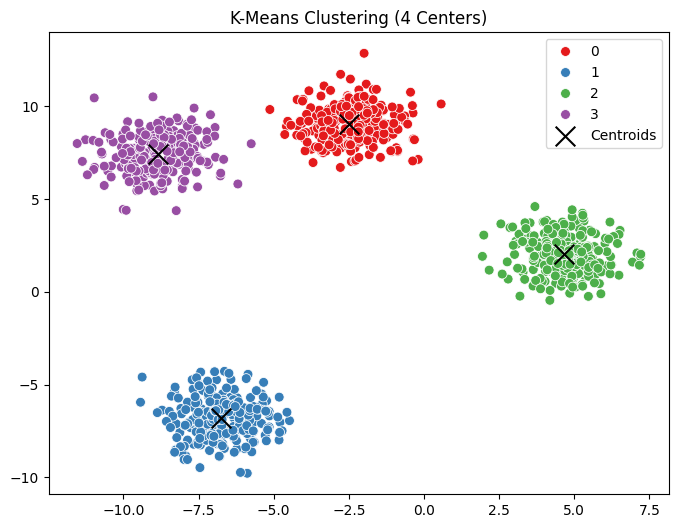

In [2]:
# 21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering (4 Centers)')
plt.legend()
plt.show()

In [3]:
# 22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = agg_cluster.fit_predict(X)

# Display first 10 predicted labels
print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


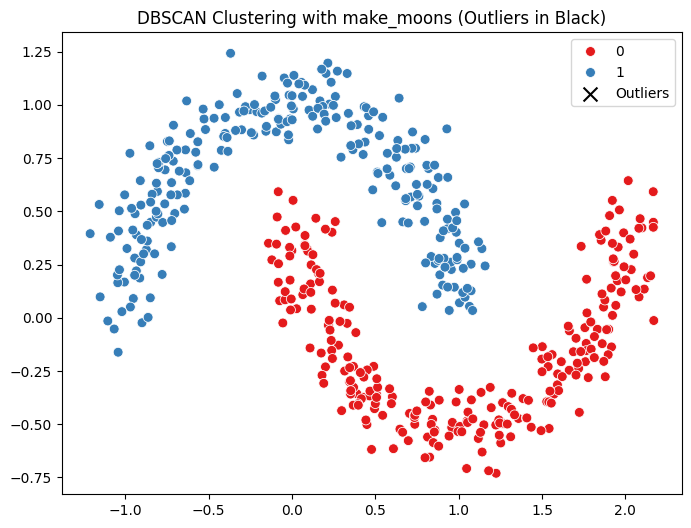

In [5]:
# 23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='black', marker='x', s=100, label='Outliers')
plt.title('DBSCAN Clustering with make_moons (Outliers in Black)')
plt.legend()
plt.show()

In [7]:
# 24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Print size of each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


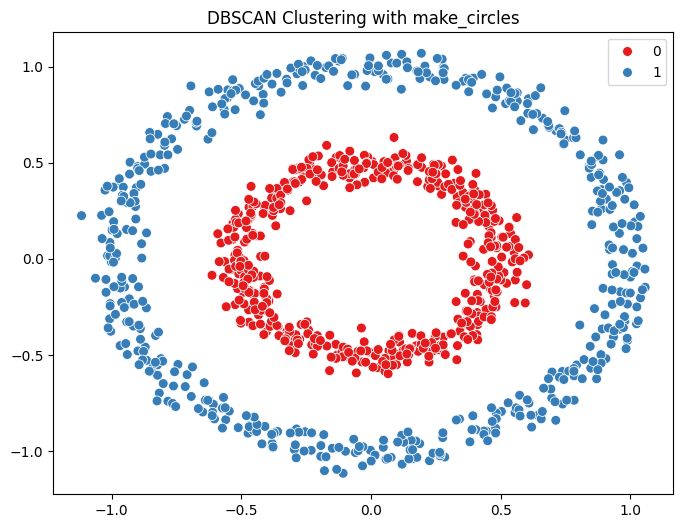

In [9]:
# 25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.title('DBSCAN Clustering with make_circles')
plt.legend()
plt.show()

In [11]:
# 26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output cluster centroids
print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


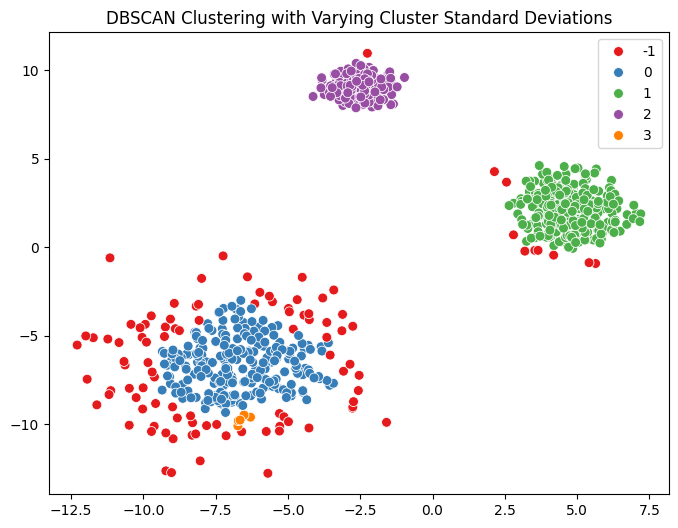

In [13]:
# 27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data with varying standard deviations
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=[0.5, 1.0, 2.0], random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.title('DBSCAN Clustering with Varying Cluster Standard Deviations')
plt.legend()
plt.show()

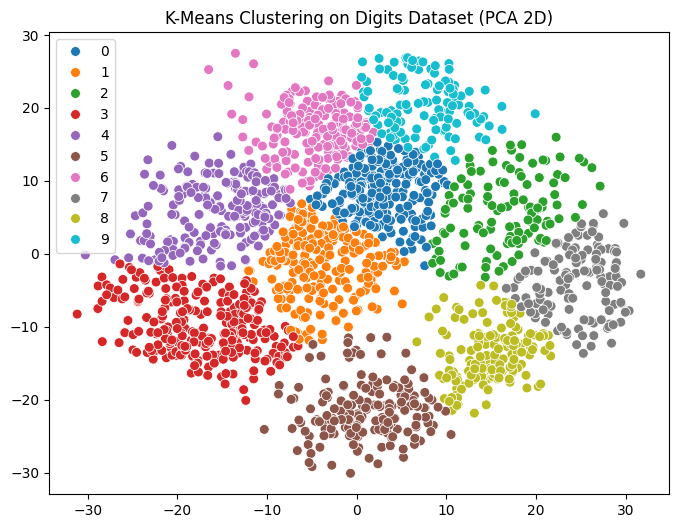

In [14]:
# 28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='tab10', s=50)
plt.title('K-Means Clustering on Digits Dataset (PCA 2D)')
plt.legend()
plt.show()


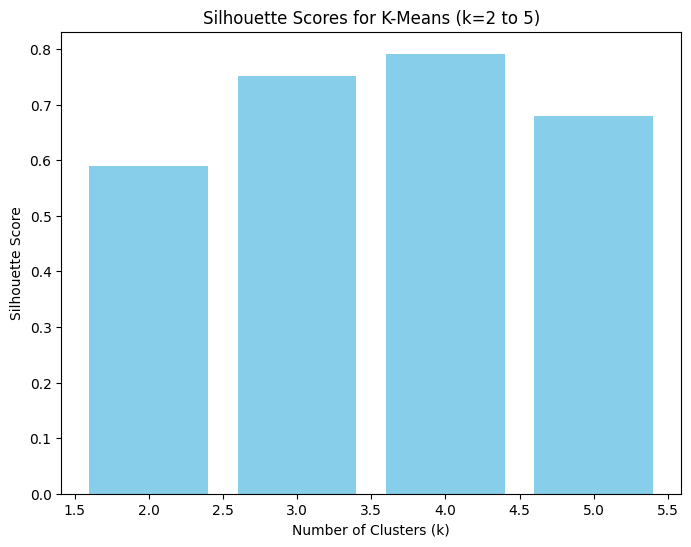

In [16]:
# 29. Create synthetic data using make_blobs and evaluate silhouette scores for k=2 to 5. Display as a bar chart.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

# Evaluate silhouette scores for k=2 to 5
sil_scores = []
k_values = range(2, 6)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Plot as bar chart
plt.figure(figsize=(8, 6))
plt.bar(k_values, sil_scores, color='skyblue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means (k=2 to 5)')
plt.show()

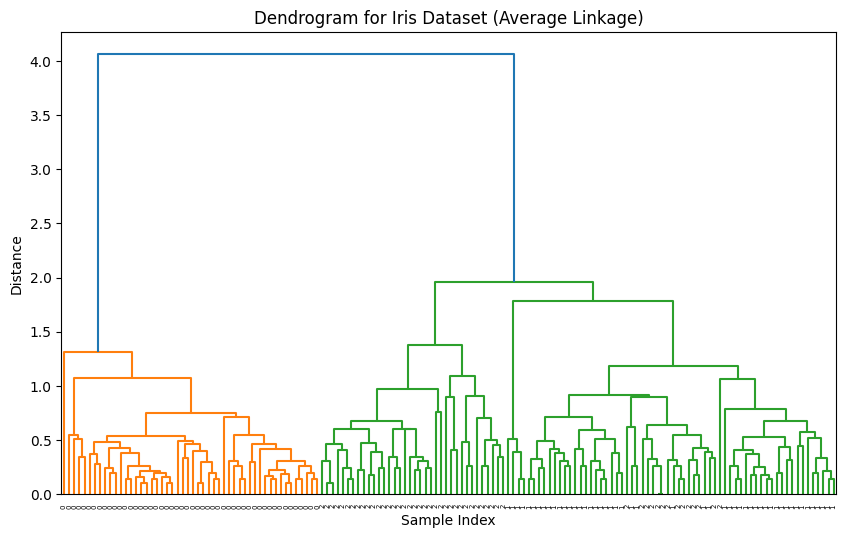

In [18]:
# 30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering with average linkage
Z = linkage(X, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=iris.target)
plt.title('Dendrogram for Iris Dataset (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

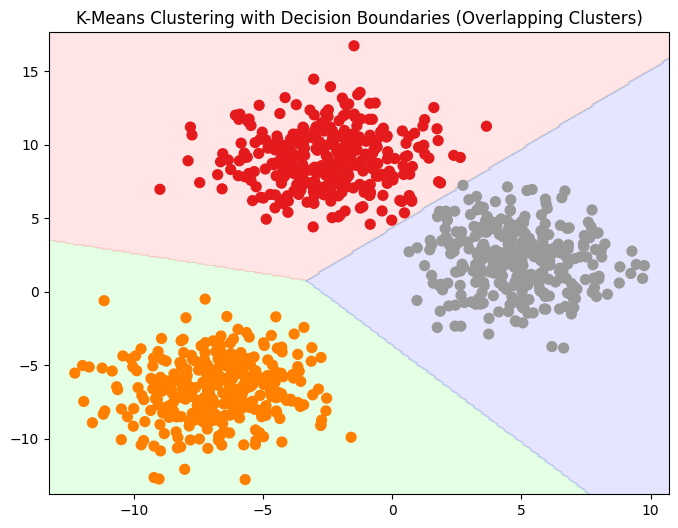

In [21]:
# 31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Generate synthetic data with overlapping clusters
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=2.0, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Create mesh grid for decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.title('K-Means Clustering with Decision Boundaries (Overlapping Clusters)')
plt.show()

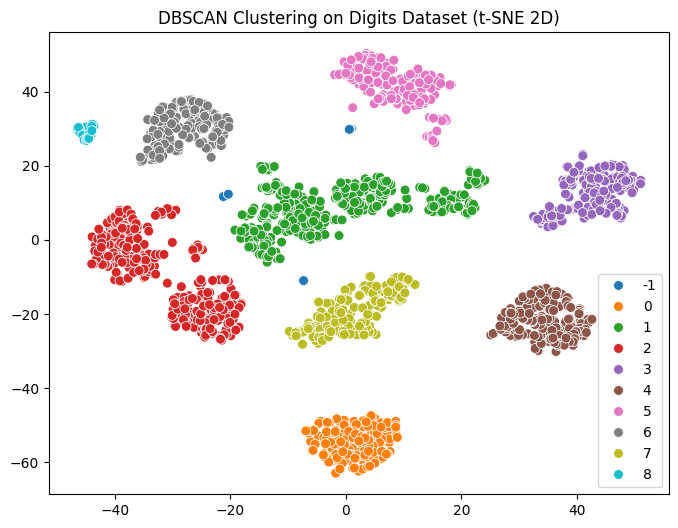

In [22]:
# 32. Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='tab10', s=50)
plt.title('DBSCAN Clustering on Digits Dataset (t-SNE 2D)')
plt.legend()
plt.show()

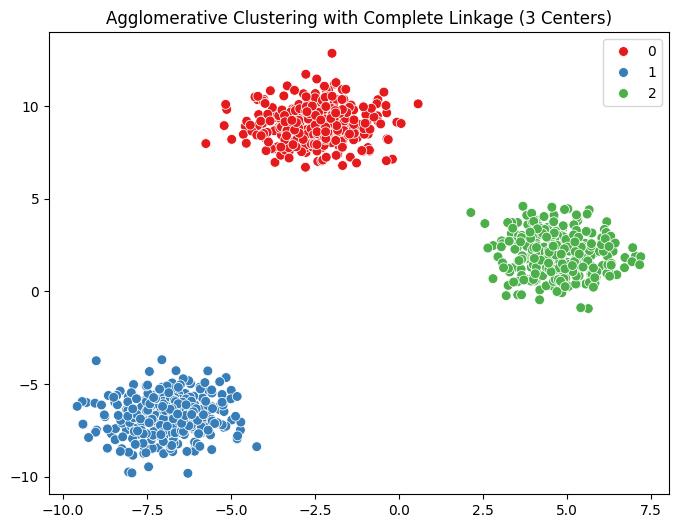

In [24]:
# 33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels = agg_cluster.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.title('Agglomerative Clustering with Complete Linkage (3 Centers)')
plt.legend()
plt.show()

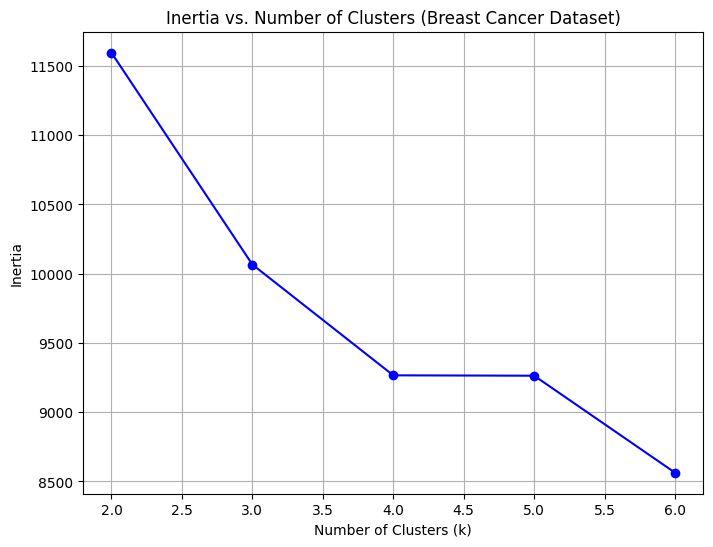

In [26]:
# 34. Load the Breast Cancer dataset and compare inertia values for K=2 to 6 using K-Means. Show results in a line plot.

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute inertia for k=2 to 6
inertia = []
k_values = range(2, 7)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot inertia values
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters (Breast Cancer Dataset)')
plt.grid(True)
plt.show()

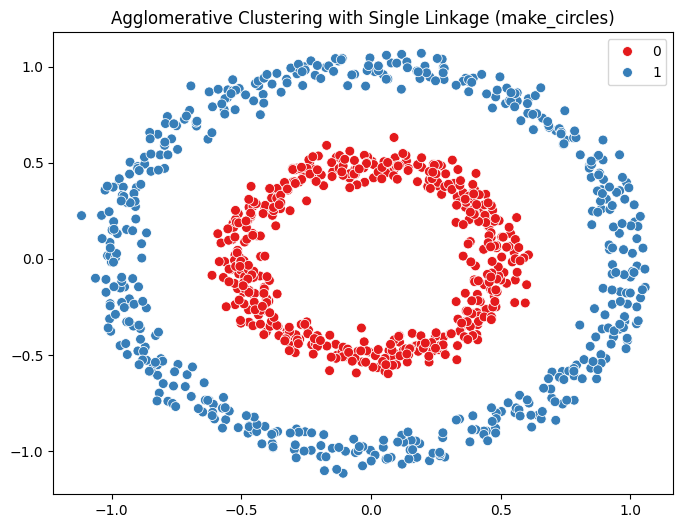

In [28]:
# 35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkag

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.05, random_state=42)

# Apply Agglomerative Clustering with single linkage
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_cluster.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.title('Agglomerative Clustering with Single Linkage (make_circles)')
plt.legend()
plt.show()

In [31]:
# 36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=2.0, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise, label -1)
n_clusters = len(np.unique(labels[labels != -1]))
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 5


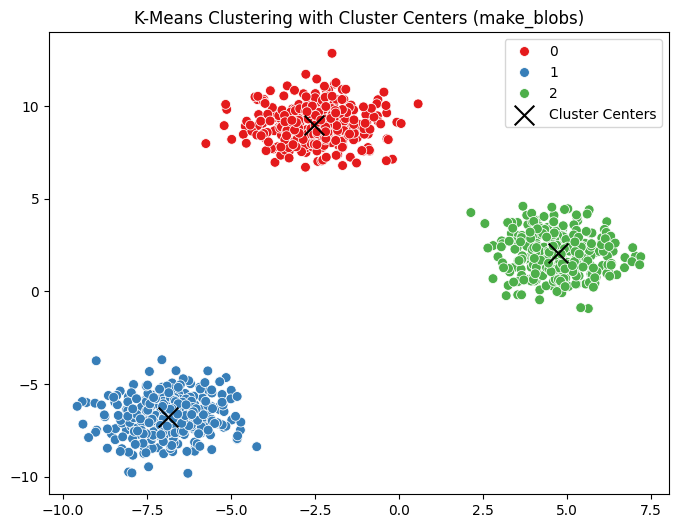

In [33]:
# 37. Generate synthetic data with make_blobs and apply K-Means. Then plot the cluster centers on top of the data points.

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', marker='x', s=200, label='Cluster Centers')
plt.title('K-Means Clustering with Cluster Centers (make_blobs)')
plt.legend()
plt.show()

In [34]:
# 38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count noise points (label -1)
n_noise = np.sum(labels == -1)
print("Number of samples identified as noise:", n_noise)


Number of samples identified as noise: 34


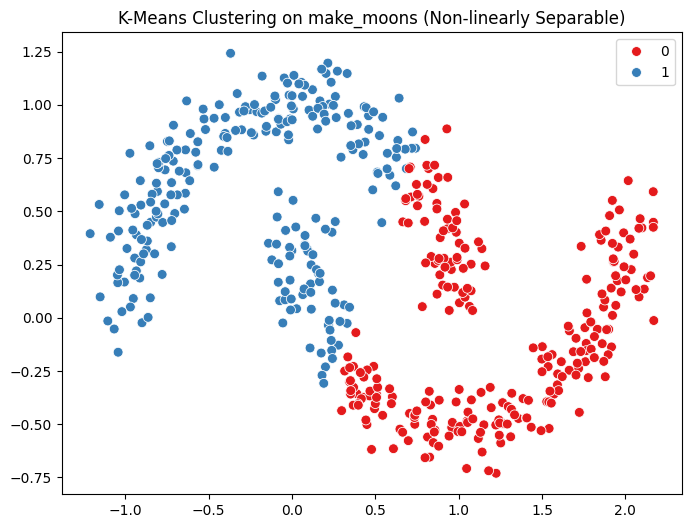

In [36]:
# 39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Visualize
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='Set1', s=50)
plt.title('K-Means Clustering on make_moons (Non-linearly Separable)')
plt.legend()
plt.show()

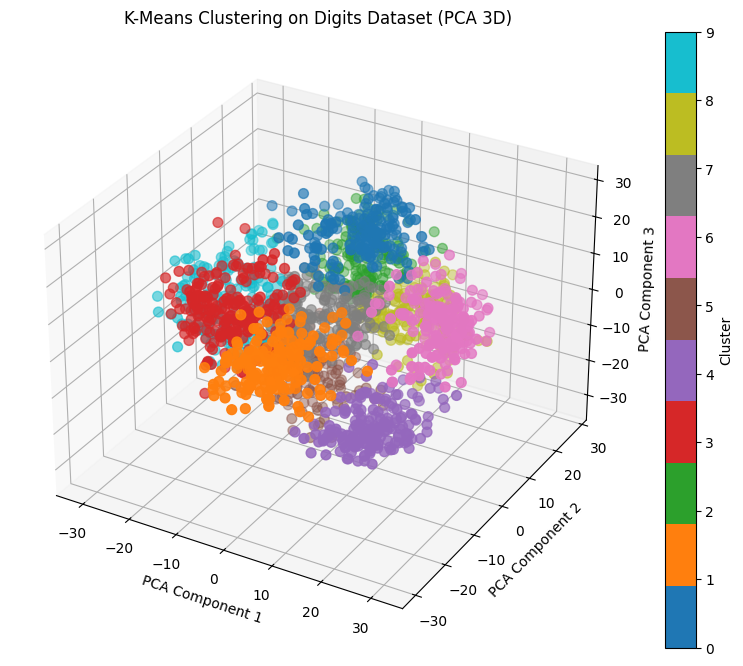

In [37]:
# 40. Load the Digits dataset, apply PCA to reduce to 3 components, then use K-Means and visualize with a 3D scatter plot.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 3 components using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualize in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='tab10', s=50)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('K-Means Clustering on Digits Dataset (PCA 3D)')
plt.colorbar(scatter, label='Cluster')
plt.show()